<a href="https://colab.research.google.com/github/yuganshjain/Drug-recommendation-system/blob/main/DrugsRecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Drugs recommendation model 

In [ ]:
# for linking drive in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# reading the data from the drive 
train = pd.read_csv('/content/drive/My Drive/Project/drugsComTrain_raw.csv')
test = pd.read_csv('/content/drive/My Drive/Project/drugsComTest_raw.csv')

In [ ]:
train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [ ]:
test.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [ ]:
# Concatenating train and test dataset over columns(same) for better recommendation and greater dataset
dataset = pd.concat([train, test], axis = 0, join = "outer")

In [ ]:
print(dataset.shape)

(215063, 7)


In [ ]:
dataset.describe()

,Unnamed: 0,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [ ]:
dataset.tail(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20
53765,113712,Arthrotec,Sciatica,"""It works!!!""",9.0,"September 13, 2009",46


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [ ]:
# Counting Null values in each column
dataset.isnull().sum(axis = 0)

Unnamed: 0        0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

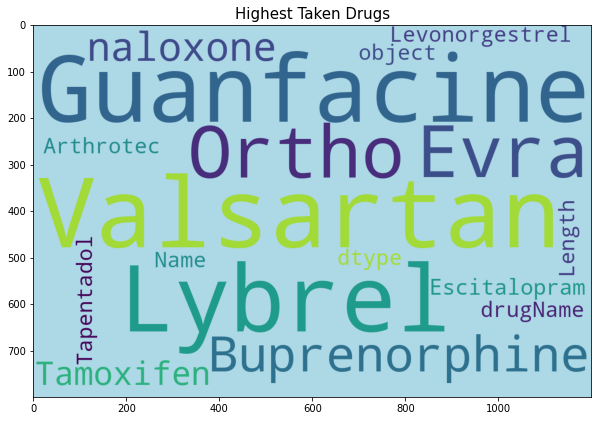

In [ ]:
# Highest taken drugs by the patients
wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(dataset.drugName))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Highest Taken Drugs', fontsize = 15)
plt.imshow(wordcloud)

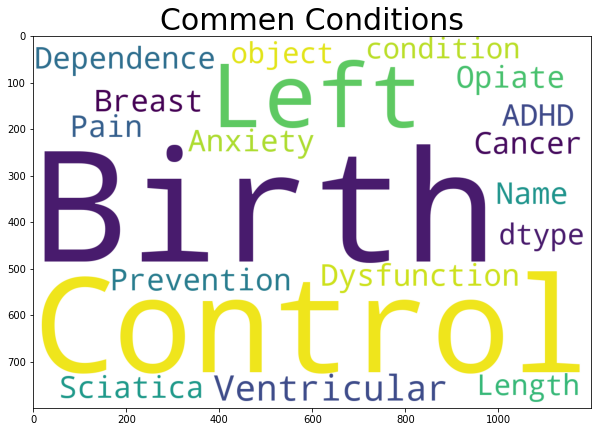

In [ ]:
# most common condition
wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 100, width = 1200, height = 800).generate(str(dataset.condition))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Commen Conditions', fontsize = 30)
plt.imshow(wordcloud)

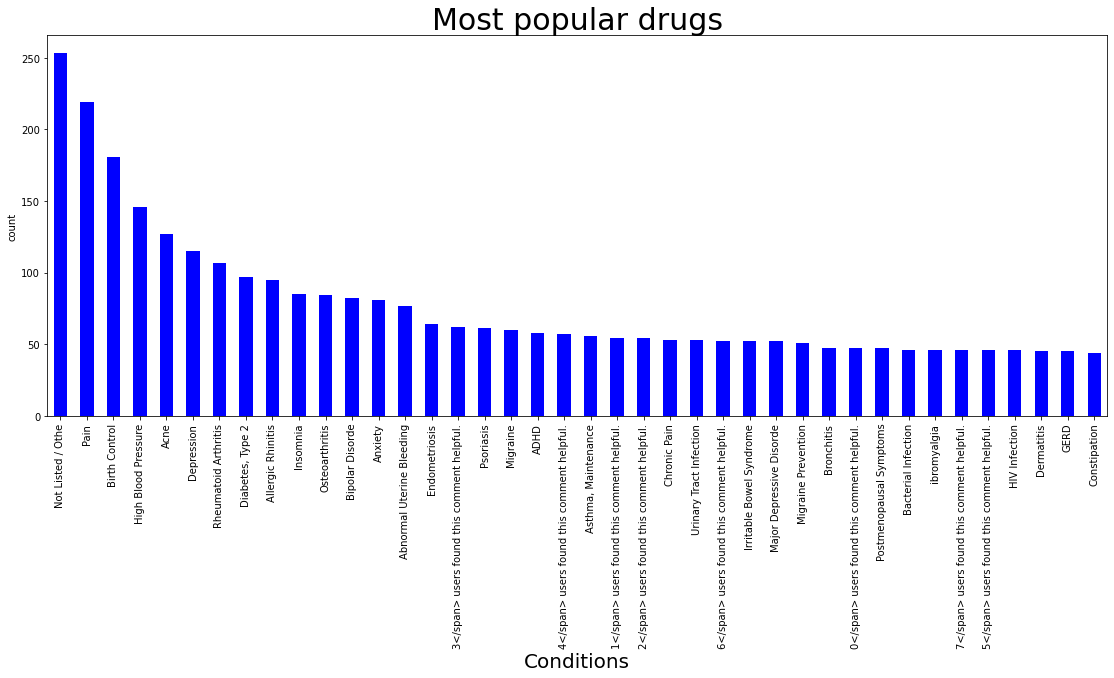

In [ ]:
# Most popular drugs per conditions

dataset.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'blue')
plt.title('Most popular drugs', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count', fontsize = 10)
plt.show()

In [ ]:
# printing first four reviews of patients
for i in range (0, 5) :
  print(train['review'][i])

"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"
"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective."
"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene,

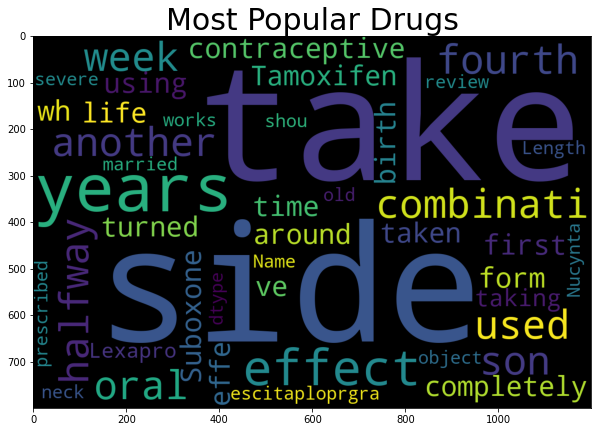

In [ ]:
# most popular drugs
wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(dataset.review))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Most Popular Drugs', fontsize = 30)
plt.imshow(wordcloud)

In [ ]:
# checking rating of drugs given by users
dataset.rating.value_counts()

10.0    68005
9.0     36708
1.0     28918
8.0     25046
7.0     12547
5.0     10723
2.0      9265
3.0      8718
6.0      8462
4.0      6671
Name: rating, dtype: int64

In [ ]:
# Assigning rating >= 5 as good drug else bad drug(0) in newly formed column Ratings

dataset.loc[(dataset['rating'] >= 5), 'RatingScore'] = 1
dataset.loc[(dataset['rating'] < 5), 'RatingScore'] = 0

dataset['RatingScore'].value_counts()

1.0    161491
0.0     53572
Name: RatingScore, dtype: int64

In [ ]:
positiveReviews = " ".join([text for text in dataset['review'][dataset['RatingScore'] == 1]])
wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(positiveReviews)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Positive Reviews', fontsize = 30)
plt.imshow(wordcloud)

NameError: ignored

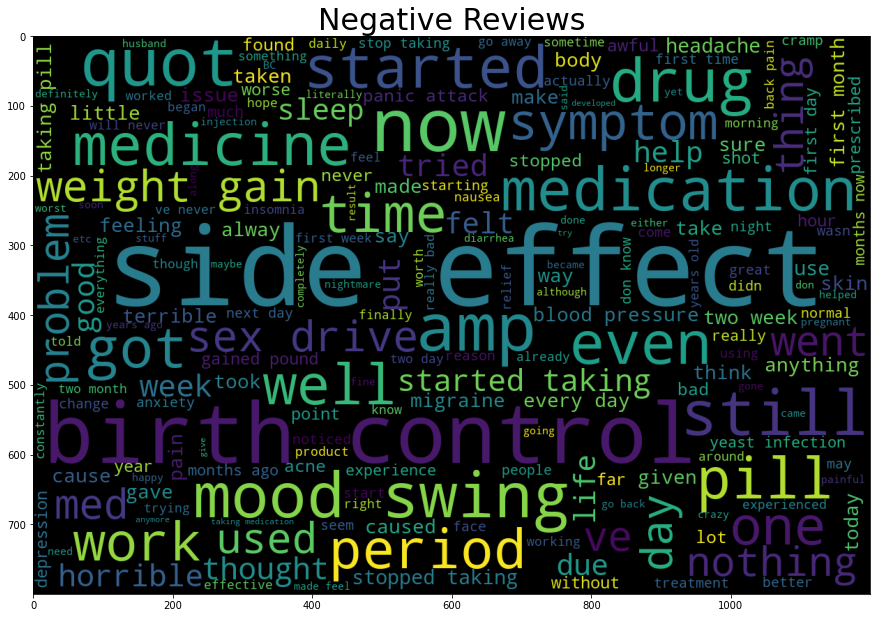

In [ ]:
negativeReviews = " ".join([text for text in dataset['review'][dataset['RatingScore'] == 0]])
wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(negativeReviews)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Negative Reviews', fontsize = 30)
plt.imshow(wordcloud)

In [ ]:
# Data Preprocessing
dataset['date'] = pd.to_datetime(dataset['date'], errors = 'coerce')
dataset['Year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month
dataset['day'] = dataset['date'].dt.day

<Figure size 1080x576 with 0 Axes>

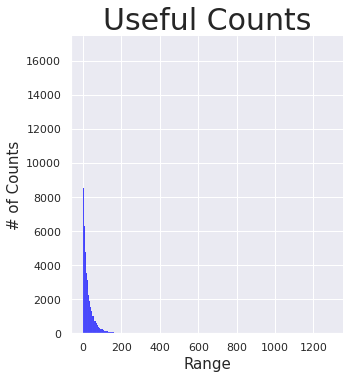

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(dataset['usefulCount'], color = 'blue')
plt.title('Useful Counts', fontsize = 30)
plt.xlabel('Range', fontsize = 15)
plt.ylabel('# of Counts', fontsize = 15)
plt.show()

In [ ]:
# data preprocessing 
dataset = dataset.dropna(axis = 0)
dataset.shape

(213869, 11)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
import re
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stops = set(stopwords.words('english'))

StopExcluded = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
stops = stops - set(StopExcluded)
len(stops)

159

In [ ]:
Conditions = pd.DataFrame(dataset.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)).reset_index()

In [ ]:
# setting a df with conditions with only one drug
ConditionsOnlyOneDrug = Conditions[Conditions['drugName'] == 1].reset_index()

all_list = set(dataset.index)

# deleting them
conditionFinal = []
for i,j in enumerate(dataset['condition']):
    for c in list(ConditionsOnlyOneDrug['condition']):
        if j == c:
            conditionFinal.append(i)
            
temp = all_list.difference(set(conditionFinal))
dataset = dataset.iloc[list(temp)].reset_index()
del dataset['index']

In [ ]:
# removing the conditions with <span> in it.
allList = set(dataset.index)
spannedList = list()
for i,j in enumerate(dataset['condition']):
    if '</span>' in j:
        spannedList.append(i)
new_idx = allList.difference(set(spannedList))
dataset = dataset.iloc[list(new_idx)].reset_index()
del dataset['index']

In [ ]:
dataset.shape

(159332, 11)

In [ ]:
stemmer = SnowballStemmer('english')

def solve(raw):
    text = BeautifulSoup(raw, 'html.parser').get_text()
    letters = re.sub('[^a-zA-Z]', ' ', text)
    chars = letters.lower().split()
    wordsMeaning = [w for w in chars if not w in stops]
    wordsStemming = [stemmer.stem(w) for w in wordsMeaning]
    return( ' '.join(wordsStemming))

In [ ]:
dataset['reviewFiltered'] = dataset['review'].apply(solve)

In [ ]:
from sklearn.model_selection import train_test_split
dataTrain, dataTest = train_test_split(dataset, test_size = 0.3, random_state = 100)

In [ ]:
import tensorflow
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

sample = CountVectorizer(max_features = 15000, ngram_range = (4, 4))
Piping = Pipeline([('vect', sample)])

dataTrainFeatures = Piping.fit_transform(dataTrain['reviewFiltered'])
dataTestFeatures = Piping.fit_transform(dataTest['reviewFiltered'])

In [ ]:
print(f"dataTrain size : {dataTrainFeatures.shape} \ndataTest Features Size {dataTestFeatures.shape}\n{dataset.columns}")

dataTrain size : (111532, 15000) 
dataTest Features Size (47800, 15000)
Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'RatingScore', 'Year', 'month', 'day', 'reviewFiltered'],
      dtype='object')


In [ ]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Bidirectional, BatchNormalization, LSTM
from keras.preprocessing.sequence import pad_sequences

In [ ]:
Ytrain = dataTrain['RatingScore']
Ytest = dataTest['RatingScore']

sample = Ytest.copy()

model = keras.models.Sequential()

model.add(keras.layers.Dense(200, input_shape=(15000,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(300))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(400))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.6))

model.add(keras.layers.Dense(300))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               3000200   
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
activation (Activation)      (None, 200)               0         
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               60300     
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0

In [ ]:
drugsRecom = model.fit(dataTrainFeatures, Ytrain.values, epochs = 20, batch_size=64)

Epoch 1/20
1743/1743 [==============================] - 13s 8ms/step - loss: 0.3884 - accuracy: 0.8246
Epoch 2/20
1743/1743 [==============================] - 13s 7ms/step - loss: 0.3855 - accuracy: 0.8259
Epoch 3/20
1743/1743 [==============================] - 13s 7ms/step - loss: 0.3838 - accuracy: 0.8261
Epoch 4/20
1743/1743 [==============================] - 13s 8ms/step - loss: 0.3805 - accuracy: 0.8277
Epoch 5/20
1743/1743 [==============================] - 14s 8ms/step - loss: 0.3803 - accuracy: 0.8275
Epoch 6/20
1743/1743 [==============================] - 13s 7ms/step - loss: 0.3777 - accuracy: 0.8280
Epoch 7/20
1743/1743 [==============================] - 13s 7ms/step - loss: 0.3763 - accuracy: 0.8290
Epoch 8/20
1743/1743 [==============================] - 13s 7ms/step - loss: 0.3748 - accuracy: 0.8299
Epoch 9/20
1743/1743 [==============================] - 13s 8ms/step - loss: 0.3745 - accuracy: 0.8296
Epoch 10/20
1743/1743 [==============================] - 14s 8ms/step - l

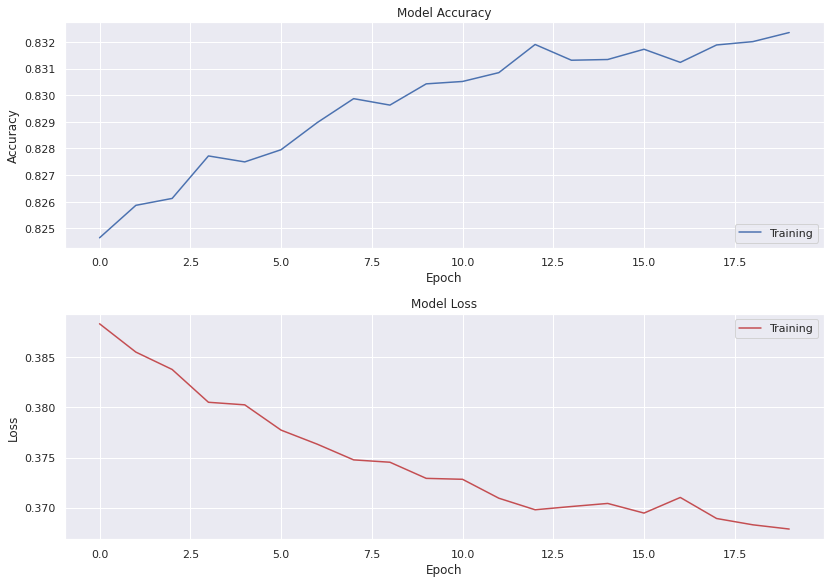

In [ ]:
plt.figure(1)
# summarize history for accuracy

plt.subplot(211)
plt.plot(drugsRecom.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss
plt.subplot(212)
plt.plot(drugsRecom.history['loss'], c = 'r')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

In [ ]:
drugsRecomPrediction = model.predict(dataTestFeatures, batch_size= 64)

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, average_precision_score, confusion_matrix,roc_auc_score, precision_recall_curve 

target = dataTrain['RatingScore']
features = ['usefulCount']

drugsRecomendationLstm = np.zeros(dataTest.shape[0])

X_train, X_test, Y_train, Y_test = train_test_split(dataTrain[features], target, test_size=0.2) 
featureImportance = pd.DataFrame() 
    
classifierLgbm = LGBMClassifier(
        n_estimators=2000,
        learning_rate=0.05,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
        
classifierLgbm.fit(X_train, Y_train,
        eval_set= [(X_train, Y_train), (X_test, Y_test)], 
        verbose=100, early_stopping_rounds=100 
    )

drugsRecomendationLgbm = classifierLgbm.predict(dataTest[features])
        
foldImportance = pd.DataFrame()
foldImportance["feature"] = features
foldImportance["importance"] = classifierLgbm.feature_importances_
featureImportance = pd.concat([featureImportance, foldImportance], axis=0)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.52749	valid_1's binary_logloss: 0.529326
[200]	training's binary_logloss: 0.527299	valid_1's binary_logloss: 0.529234
[300]	training's binary_logloss: 0.527225	valid_1's binary_logloss: 0.529198
[400]	training's binary_logloss: 0.527153	valid_1's binary_logloss: 0.529212
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.52721	valid_1's binary_logloss: 0.529194


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'RatingScore', 'Year', 'month', 'day', 'reviewFiltered'],
      dtype='object')

In [ ]:
# common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
from textblob import TextBlob
from tqdm import tqdm
reviews = dataset['reviewFiltered']

predict = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    predict += [blob.sentiment.polarity]
dataset["PredictedSentiment"] = predict
dataset.tail()

100%|██████████| 159332/159332 [00:49<00:00, 3250.45it/s]


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,RatingScore,Year,month,day,reviewFiltered,Predict_Sentiment,PredictedSentiment
159327,12455,Ortho Micronor,Birth Control,"""I have been on this pill for about 5 months n...",7.0,2016-12-27,8,1.0,2016,12,27,pill month still period even though suppos get...,-0.025000,-0.025000
159328,188836,Prevacid,GERD,"""I have tried this in the past and it works so...",10.0,2016-02-08,13,1.0,2016,2,8,tri past work much better other tri use eat le...,0.231250,0.231250
159329,224712,Bupropion,Depression,"""First of all, I did not begin taking this or ...",10.0,2017-04-10,21,1.0,2017,4,10,first not begin take antidepress specif depres...,0.301852,0.301852
159330,153302,Doxycycline,Acne,"""I have been taking the doxycycline for about ...",8.0,2014-12-17,59,1.0,2014,12,17,take doxycyclin week consist seen tremend chan...,0.500000,0.500000
159331,115379,Propofol,Anesthesia,"""I was given propofol 3 years ago when I had t...",10.0,2016-02-17,9,1.0,2016,2,17,given propofol year ago total joint replac sur...,0.125000,0.125000


In [ ]:
# performing NLP on dataset['review'] column
reviews = dataset['review']

predict = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    predict += [blob.sentiment.polarity]
dataset["PredictSentimentReview"] = predict

100%|██████████| 159332/159332 [01:41<00:00, 1570.87it/s]


In [ ]:
print(np.corrcoef(dataset["PredictedSentiment"], dataset["rating"]))

[[1.         0.25713182]
 [0.25713182 1.        ]]


In [ ]:
print(np.corrcoef(dataset["PredictSentimentReview"], dataset["rating"]))


[[1.         0.34883859]
 [0.34883859 1.        ]]


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'RatingScore', 'Year', 'month', 'day', 'reviewFiltered',
       'Predict_Sentiment', 'PredictedSentiment', 'PredictSentimentReview'],
      dtype='object')

In [ ]:
# cleaning of Data
import string

dataset['count_sent'] = dataset["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)
dataset['count_word'] = dataset["reviewFiltered"].apply(lambda x: len(str(x).split()))
dataset['count_unique_word'] = dataset["reviewFiltered"].apply(lambda x: len(set(str(x).split())))
dataset['count_letters'] = dataset["reviewFiltered"].apply(lambda x: len(str(x)))

dataset["count_punctuations"] = dataset["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
dataset["count_words_upper"] = dataset["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
dataset["count_words_title"] = dataset["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
dataset["count_stopwords"] = dataset["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))
dataset["mean_word_len"] = dataset["reviewFiltered"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
dataset['season'] = dataset["month"].apply(lambda x: 1 if ((x>2) & (x<6)) else(2 if (x>5) & (x<9) else (3 if (x>8) & (x<12) else 4)))

In [ ]:
# lenght of train
trainingLength = dataTrain.shape[0]

In [ ]:
dataTrain = dataset[:trainingLength]
dataTest = dataset[trainingLength:]

In [ ]:
print(f"Training Size : {dataTrain.shape} \nTesting Size : {dataTest.shape}\n{dataTrain.columns}")

Training Size : (111532, 25) 
Testing Size : (47800, 25)
Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'RatingScore', 'Year', 'month', 'day', 'reviewFiltered',
       'Predict_Sentiment', 'PredictedSentiment', 'PredictSentimentReview',
       'count_sent', 'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len', 'season'],
      dtype='object')


In [ ]:
from lightgbm import LGBMClassifier

target = dataTrain['RatingScore']

features = ['usefulCount','day','Year','month','PredictedSentiment','PredictSentimentReview', 'count_sent',
          'count_word', 'count_unique_word', 'count_letters', 'count_punctuations',
          'count_words_upper', 'count_words_title', 'count_stopwords', 'mean_word_len', 'season']

drugsRecomendationLgbm = np.zeros(dataTest.shape[0])

X_train, X_test, Y_train, Y_test = train_test_split(dataTrain[features], target, test_size=0.2) 
featureImportance = pd.DataFrame() 
    
classifierLgbm = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )

classifierLgbm.fit(X_train, Y_train,
        eval_set= [(X_train, Y_train), (X_test, Y_test)], 
        verbose=100, early_stopping_rounds=100 
    )

drugsRecomendationLgbm = classifierLgbm.predict(dataTest[features])
        
foldImportance = pd.DataFrame()
foldImportance["feature"] = features
foldImportance["importance"] = classifierLgbm.feature_importances_
featureImportance = pd.concat([featureImportance, foldImportance], axis=0)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.439541	valid_1's binary_logloss: 0.457127
[200]	training's binary_logloss: 0.420191	valid_1's binary_logloss: 0.451984
[300]	training's binary_logloss: 0.403289	valid_1's binary_logloss: 0.447665
[400]	training's binary_logloss: 0.387298	valid_1's binary_logloss: 0.44395
[500]	training's binary_logloss: 0.37349	valid_1's binary_logloss: 0.440526
[600]	training's binary_logloss: 0.360329	valid_1's binary_logloss: 0.437604
[700]	training's binary_logloss: 0.347962	valid_1's binary_logloss: 0.43514
[800]	training's binary_logloss: 0.336107	valid_1's binary_logloss: 0.432565
[900]	training's binary_logloss: 0.325243	valid_1's binary_logloss: 0.430621
[1000]	training's binary_logloss: 0.314681	valid_1's binary_logloss: 0.428245
[1100]	training's binary_logloss: 0.30466	valid_1's binary_logloss: 0.426188
[1200]	training's binary_logloss: 0.294961	valid_1's binary_logloss: 0.424165
[1300]	trainin

In [ ]:
print(confusion_matrix(y_pred=drugsRecomendationLgbm, y_true=dataTest['RatingScore']))

[[ 6043  5697]
 [ 2121 33939]]


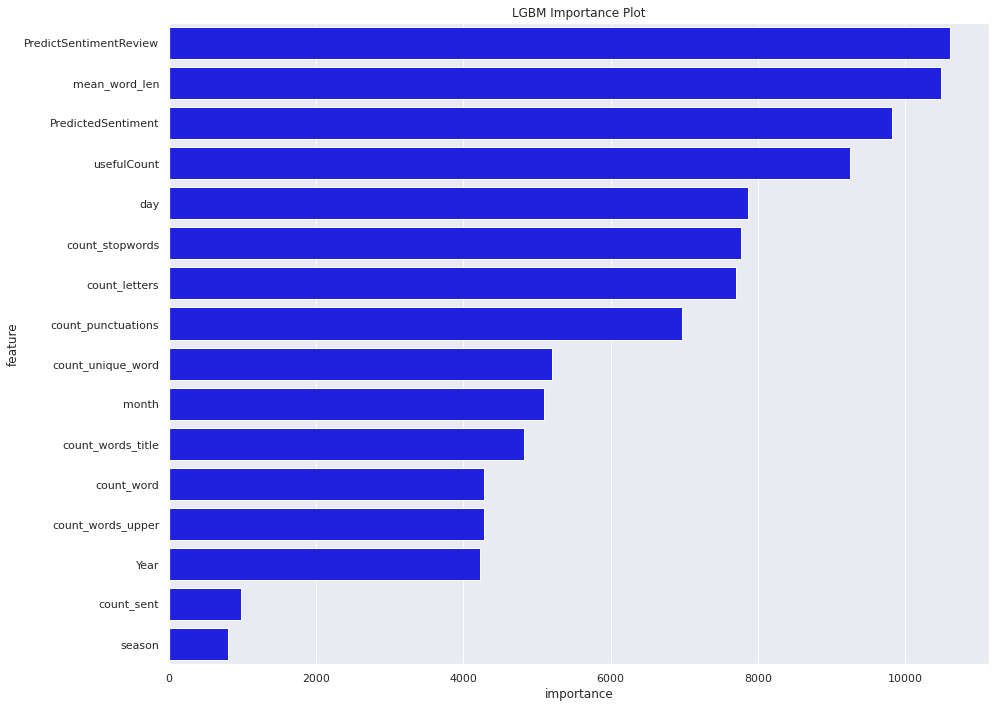

In [ ]:
cols = featureImportance[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending = False)[:50].index

best_features = featureImportance.loc[featureImportance.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data = best_features.sort_values(by="importance", ascending=False), orient = "h", color = "blue")
plt.title('LGBM Importance Plot')
plt.tight_layout()

In [ ]:
# Dictionary_Sentiment_Analysis
# import dictionary data
dictionary = pd.read_csv("/content/drive/My Drive/Project/dictionary.csv")
dictionary.tail(10)

,Entry,Source,Positiv,Negativ
11778,ZEAL,H4Lvd,NaN,NaN
11779,ZEALAND#1,Lvd,NaN,NaN
11780,ZEALAND#2,Lvd,NaN,NaN
11781,ZEALOUS,H4Lvd,NaN,NaN
11782,ZEN,H4,NaN,NaN
11783,ZENITH,H4,Positiv,NaN
11784,ZERO,H4Lvd,NaN,NaN
11785,ZEST,H4,Positiv,NaN
11786,ZINC,H4Lvd,NaN,NaN
11787,ZONE,H4Lvd,NaN,NaN


In [ ]:
# Positive Word List
temp_Positiv, positiveWords = [], []
for i in range(0,len(dictionary.Positiv)):
    if dictionary.iloc[i,2] == "Positiv":
        temp = dictionary.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Positiv.append(temp2)

positiveWords = list(set(temp_Positiv))

In [ ]:
#Negativ word list 

temp_Negativ, negativeWords = [], []
for i in range(0,len(dictionary.Negativ)):
    if dictionary.iloc[i,3] == "Negativ":
        temp = dictionary.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Negativ.append(temp2)

negativeWords = list(set(temp_Negativ))

In [ ]:
##2. counting the word 98590

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary = positiveWords)
content = dataTest['reviewFiltered']
X = vectorizer.fit_transform(content)
f = X.toarray()
f = pd.DataFrame(f)
f.columns = positiveWords
dataTest["countPositiveWords"] = f.sum(axis=1)

vectorizer2 = CountVectorizer(vocabulary = negativeWords)
content = dataTest['reviewFiltered']
X2 = vectorizer2.fit_transform(content)
f2 = X2.toarray()
f2 = pd.DataFrame(f2)
f2.columns=negativeWords
dataTest["countNegativeWords"] = f2.sum(axis=1)

In [ ]:
# decide sentiment
dataTest["PositiveRatio"] = dataTest["countPositiveWords"] / (dataTest["countPositiveWords"] + dataTest["countNegativeWords"])
dataTest["sentimentDictionary"] = dataTest["PositiveRatio"].apply(lambda x: 1 if (x >= 0.5) else (0 if ( x < 0.5) else 0.5))

In [ ]:
def countUseful(dataset):
    grouped = dataset.groupby(['condition']).size().reset_index(name='user_size')
    dataset = pd.merge(dataset, grouped, on='condition', how='left')
    return dataset

dataTest =  countUseful(dataTest) 
dataTest['usefulCount'] = dataTest['usefulCount'] / dataTest['user_size']

In [ ]:
dataTest.head(10)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,RatingScore,Year,month,day,reviewFiltered,Predict_Sentiment,PredictedSentiment,PredictSentimentReview,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,season,countPositiveWords,countNegativeWords,PositiveRatio,sentimentDictionary,user_size
0,69866,Tylenol,eve,"""Pain: not very effective. No side effects, ...",9.0,2011-05-10,4.500000,1.0,2011,5,10,pain not effect no side effect easi use fever ...,0.017500,0.017500,0.047513,3,18,16,94,11,0,5,7,4.277778,1,NaN,NaN,NaN,0.5,4
1,218601,Tri-Sprintec,Birth Control,"""I forgot to add that while I was on this pill...",1.0,2016-09-28,0.000231,0.0,2016,9,28,forgot add pill second month take two week tap...,-0.036061,-0.036061,0.081667,1,62,50,354,27,11,11,65,4.725806,3,NaN,NaN,NaN,0.5,8669
2,55775,Effexor,Depression,"""I spent several years taking Citalopram, whic...",1.0,2013-10-07,0.020573,0.0,2013,10,7,spent sever year take citalopram found good st...,0.044444,0.044444,0.060000,1,57,51,356,19,11,17,68,5.263158,3,NaN,NaN,NaN,0.5,2722
3,72630,Ethinyl estradiol / norethindrone,Birth Control,"""I have been on microgestin for about a year ...",8.0,2015-09-23,0.000000,1.0,2015,9,23,microgestin year love begin mess pill kept tak...,0.050000,0.050000,0.112424,1,55,46,310,31,12,16,67,4.654545,3,NaN,NaN,NaN,0.5,8669
4,132196,Ativan,Anxiety,"""This drug has saved my life, I take 1 mg twic...",10.0,2016-02-27,0.057503,1.0,2016,2,27,drug save life take mg twice daili sever anxie...,0.005556,0.005556,0.037847,1,70,56,392,28,6,10,67,4.614286,4,NaN,NaN,NaN,0.5,1826
5,77981,Retin-A,Acne,"""I was on the 0.1 cream started Oct 2014 and e...",3.0,2015-04-25,0.019903,0.0,2015,4,25,cream start oct end earli march got whitehead ...,0.044167,0.044167,-0.107456,1,56,47,317,37,6,16,62,4.678571,1,NaN,NaN,NaN,0.5,1658
6,209369,Zomig,Migraine,"""I havent found any medication that helps with...",1.0,2017-01-11,0.007707,0.0,2017,1,11,havent found medic help migrain zomig caus exp...,-0.089286,-0.089286,-0.190873,1,59,50,348,18,1,8,33,4.915254,4,NaN,NaN,NaN,0.5,519
7,115148,Diazepam,Anxiety,"""When I returned from my second tour in Vietna...",10.0,2012-08-17,0.085980,1.0,2012,8,17,return second tour vietnam mess mental diagnos...,0.033995,0.033995,0.074237,1,34,33,225,16,3,14,23,5.647059,2,NaN,NaN,NaN,0.5,1826
8,163905,Chlorpheniramine / phenylephrine,Cold Symptoms,"""The best medicine for colds. Cleared immedia...",10.0,2011-10-02,0.062500,1.0,2011,10,2,best medicin cold clear immedi sinus prevent s...,0.238889,0.238889,0.483333,1,19,18,111,6,1,4,12,4.894737,3,NaN,NaN,NaN,0.5,32
9,37506,Vyvanse,ADHD,"""Works great for me.""",10.0,2012-02-13,0.009579,1.0,2012,2,13,work great,0.800000,0.800000,0.800000,1,2,2,10,3,0,1,1,4.500000,4,NaN,NaN,NaN,0.5,1044


In [ ]:
dataTest['deepPrediction'] = drugsRecom
dataTest['machinePrediction'] = drugsRecomendationLgbm
dataTest['totalPrediction'] = (dataTest['deepPrediction'] + dataTest['machinePrediction'] + dataTest['sentimentDictionary']) * dataTest['usefulCount']
sample = dataTest

In [ ]:
Result = dataTest.groupby(['condition','drugName']).agg({'totalPrediction' : ['mean']})

In [ ]:
Result

totalPrediction
                                      mean
condition   drugName                      
ADHD        Adderall              0.093814
            Adderall XR           0.060427
            Adzenys XR-ODT        0.016762
            Amantadine            0.028736
            Amphetamine           0.023148
...                                    ...
zen Shoulde Ibuprofen             0.000000
            Nabumetone           15.714286
            Naproxen              3.214286
            Relafen              17.857143
            Voltaren             11.785714

[5055 rows x 1 columns]